<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
CS6501 - MACHINE LEARNING AND APPLICATIONS
#**Business Analytics - MSc**
ET5003 - MACHINE LEARNING APPLICATIONS 
##***Annual Repeat***
###Instructor: Enrique Naredo

###RepMLA_Etivity-2


In [1]:
#@title Current Date
from datetime import date
Today = date.today() #@param {type:"date"}
print(Today)

2021-08-04


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "0427845" #@param {type:"string"}
Student_full_name = "Alison O'Connor" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Draft' #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# Etivity-2

# Introduction

The purpose of this notebook is to investigate the a dataset [MNIST](https://en.wikipedia.org/wiki/MNIST_database) of handwritten numbers in the range of zero to nine using logistic regression. The dataset was provided as part of the class materials for this module but other forms of it are available to download [online](http://yann.lecun.com/exdb/mnist/). Both the training and test datasets used here contain 64 columns of data. The first column represents the known value of the handwritten number (i.e. the labelled class of the number), the remaining columns  flattened arrays representing a $8 \times 8$ matrix of pixels where the measurement represents the amount of light intensity present. The contrasted image ranges from black (at the weakest light intensity) to white (at the strongest light intensity). 

Logistic regression is a predictive analysis for binary dependent [variables](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-logistic-regression/#:~:text=Logistic%20regression%20is%20the%20appropriate,variable%20is%20dichotomous%20(binary).&text=Logistic%20regression%20is%20used%20to,or%20ratio%2Dlevel%20independent%20variables). The simplist form of logistic regression is known as binomial regression where the outcome for a dependent variable has only two possible types ('YES' or 'NO'). In our case given a dataset of handwritten values between 0-9 we look at each individual test set value and classify it as 'YES' or 'NO' in comparision to a specific target value. For example, if our test value is known to be a handwritten numeral '7' we test the variable against each possible target (i.e. 0, 1, 2.....9) and assign a probability that the test value is that target. The test class is assigned to the value with the greatest probability. Where the outcome has three or more possiblities [multinominal logistic regression](https://en.wikipedia.org/wiki/Multinomial_logistic_regression) is applied. Multinominal logistic regression is almost identical to binary logistic regression excepting that there 'K' possible outcomes as opposed to two ('YES' or 'NO') so the example previously given is simplified as we no longer need to search every possible target for every test case as the model should be able to identify features that are associated with a specific categorical outcome. 

Multilayer perceptron (MLP) is a feedforward artifical neural network (ANN) that consists a minimum of three layers of nodes: The input layer (Layer 1), a hidden layer (Layer 2) and an output layer (Layer 3). The number of nodes in the input layer and the ouput layer are directly dependent on project data shape and requested output data. Generally the number of nodes in the hidden layer lies [between](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw) the number of nodes in the input and output layers. [Others](https://www.linkedin.com/pulse/choosing-number-hidden-layers-neurons-neural-networks-sachdev/) recommend the initial number of nodes in the hidden layer are calculated using $\sqrt{N_i * N_o}$, where $N_i$ represents the number of nodes in the input layer and $N_o$ the number of nodes in the output layer. In actuality the number of nodes within each layer are project specific so generalisations using methods used above should be applied cautiously.  


## Dataset

The MNIST dataset is imported from sklearn datasets.The dataset consists of 1797 samples with a flattened arrayof features representing an 8x8 image of a single handwritten digit.

The data is segregated into the following sections:
    1. X represents the 8x8 features of the dataset
    2. y represents the known classification of the value (i.e. the target)
    
Using sklearn the data are separated into a training set (comprised of 80% of the original dataset) and a test set (comprised of 20% of the original dataset). These arrays are named as follows:
    1. Xtrain: 80% of original dataset features
    2. ytrain: 80% of original known classification
    3. Xtest: 20% of original dataset features
    4. ytest: 20% of original known classification

In [4]:
# import some data from sklearn
from sklearn import datasets

# load the MNIST (digits) dataset
mnist = datasets.load_digits()

##SPLIT INTO DATA AND TARGET
X=mnist.data
y=mnist.target

from sklearn.model_selection import train_test_split
##SPLIT DATASET INTO TRAINING AND TEST SET (80% training, 20% test)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

print('The Xtrain dataset contains %s rows and %s columns of data representing 80%% of the original dataset'
      %(Xtrain.shape[0], Xtrain.shape[1]))
print('The Xtest dataset contains %s rows and %s columns of data 20%% of the original dataset'
      %(Xtest.shape[0], Xtest.shape[1]))

The Xtrain dataset contains 1437 rows and 64 columns of data representing 80% of the original dataset
The Xtest dataset contains 360 rows and 64 columns of data 20% of the original dataset


# Plot a value from the training set

Here we show an image from the training set to show how these handwritten values appear to the machine. We also print the known value from the target list

The known class of this image is 7


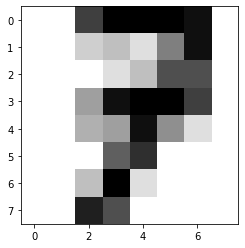

In [5]:
import matplotlib.pyplot as plt

plt.imshow(Xtrain[0].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

print('The known class of this image is %s'%(ytrain[0]))

# Scaling the data (Normalising)

The imported [dataset](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) features represent the number of pixels (0-16) in a nonoverlapping 4x4 block. To prepare the dataset for logistic regression we scale the data to be in the range of 0-1. To apply this scaling we find the maximum value in feature list and then divide all features by this value.

In [6]:
##FOR COMPARISION PURPOSES PRINT FIRST ROW OF Xtrain
print('Xtrain features prior to scaling')
print(Xtrain[0])
print('\n')
##Calculate the maximum feature value
my_max=max(Xtrain.max(), Xtest.max())


##APPLY SCALING TO THE X DATA
scaleXtrain=Xtrain/my_max
scaleXtest=Xtest/my_max

##CHECK THIS HAS BEEN APPLIED
print('Xtrain features post scaling')
print(scaleXtrain[0])

Xtrain features prior to scaling
[ 0.  0. 12. 16. 16. 16. 15.  0.  0.  0.  3.  4.  2.  8. 15.  0.  0.  0.
  0.  2.  4. 11. 11.  0.  0.  0.  6. 15. 16. 16. 12.  0.  0.  0.  5.  6.
 15.  7.  2.  0.  0.  0.  0. 10. 13.  0.  0.  0.  0.  0.  4. 16.  2.  0.
  0.  0.  0.  0. 14. 11.  0.  0.  0.  0.]


Xtrain features post scaling
[0.     0.     0.75   1.     1.     1.     0.9375 0.     0.     0.
 0.1875 0.25   0.125  0.5    0.9375 0.     0.     0.     0.     0.125
 0.25   0.6875 0.6875 0.     0.     0.     0.375  0.9375 1.     1.
 0.75   0.     0.     0.     0.3125 0.375  0.9375 0.4375 0.125  0.
 0.     0.     0.     0.625  0.8125 0.     0.     0.     0.     0.
 0.25   1.     0.125  0.     0.     0.     0.     0.     0.875  0.6875
 0.     0.     0.     0.    ]


# Scaling using multiple methods (standardisation and normalisation)

Here we investigate the use of sklearn standardising and normalising features on the logistic regression method. We first plot a histogram of the original data (as-received). We then apply a standard scaler to look at how the x-axis data might be re-evaluated with regards to mean and standard deviation of the dataset. The resultant arrays are now outside the range 0-1 so we apply sklearn MinMax scaler to the standardised data to see what affect that has. The returned array is now identical to our original data indicating that standardisation doesn't affect our analysis. 

Xtrain features prior to scaling
[ 0.  0. 12. 16. 16. 16. 15.  0.  0.  0.  3.  4.  2.  8. 15.  0.  0.  0.
  0.  2.  4. 11. 11.  0.  0.  0.  6. 15. 16. 16. 12.  0.  0.  0.  5.  6.
 15.  7.  2.  0.  0.  0.  0. 10. 13.  0.  0.  0.  0.  0.  4. 16.  2.  0.
  0.  0.  0.  0. 14. 11.  0.  0.  0.  0.]


This histogram shows that the data is skewed significantly over the array.


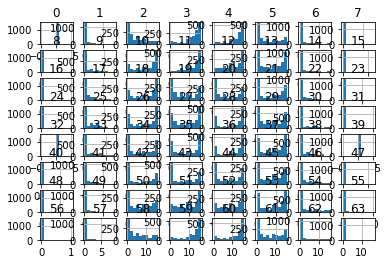

In [7]:
##FOR COMPARISION PURPOSES PRINT FIRST ROW OF Xtrain
print('Xtrain features prior to scaling')
print(Xtrain[0])
print('\n')

##IMPORT PANDAS
import pandas as pd

print('This histogram shows that the data is skewed significantly over the array.')

##CONVERT ORIGINAL DATA TO DF AND PLOT HISTOGRAM
df=pd.DataFrame(Xtrain)
df.hist()
plt.show()

Here we apply the standard scaler to the data to see how this affects data
Xtrain features post scaling
[ 0.         -0.32565499  1.45417548  0.98663267  0.95404882  1.77792739
  4.05837828 -0.11764603 -0.06103492 -0.62925557 -1.35196505 -2.00296061
 -1.72518556 -0.03880431  3.69290714 -0.12137141 -0.04311807 -0.72829335
 -1.7490014  -0.84875615 -0.50746336  0.49451051  2.89641656 -0.10883904
 -0.03733267 -0.79236509 -0.50950002  1.05000777  0.98677179  1.43814262
  2.62715424 -0.0528332   0.         -0.67215861 -0.41087443 -0.47068107
  0.79284571 -0.29803375 -0.27172732  0.         -0.06863098 -0.520058
 -1.02982532  0.45633835  0.8550717  -1.44580686 -0.79650024 -0.07850851
 -0.03963009 -0.39828733 -0.60581079  1.25669245 -1.4123406  -1.46219617
 -0.75742561 -0.2110302  -0.02638899 -0.294469    1.66775879 -0.2433387
 -2.43188377 -1.14538818 -0.5020491  -0.20033619]


The application of the standard scaler has not affected the shape of the data but does affect the x-axis range consid

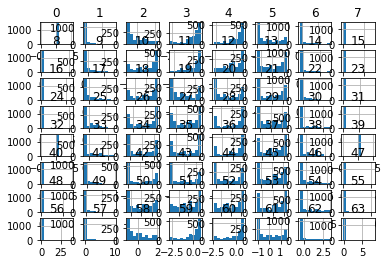

In [8]:
print('Here we apply the standard scaler to the data to see how this affects data')
##IMPORT STANDARDSCALER AND MAXMINSCALER
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
ss_Xtrain=scaler.fit_transform(Xtrain)
ss_Xtest=scaler.fit_transform(Xtest)


##CHECK THIS HAS BEEN APPLIED
print('Xtrain features post scaling')
print(ss_Xtrain[0])

print('\n')
print('The application of the standard scaler has not affected the shape of the data but does affect the x-axis range considerably')

##convert to df and plot histogram
df=pd.DataFrame(ss_Xtrain)
df.hist()
plt.show()

Here we normalise the scaled data using sklearns MinMaxScaler function


Xtrain features post scaling and normalising
[0.         0.         0.75       1.         1.         1.
 0.9375     0.         0.         0.         0.1875     0.25
 0.125      0.5        0.9375     0.         0.         0.
 0.         0.125      0.25       0.6875     0.6875     0.
 0.         0.         0.375      0.9375     1.         1.
 0.8        0.         0.         0.         0.3125     0.375
 0.9375     0.4375     0.14285714 0.         0.         0.
 0.         0.625      0.8125     0.         0.         0.
 0.         0.         0.25       1.         0.125      0.
 0.         0.         0.         0.         0.875      0.6875
 0.         0.         0.         0.        ]


The application of the min max scaler has now normalised the x-axis to range of 0-1
The returned value is now identical to our original analysis.
This indicates that standardisation doesnt impact the analysis


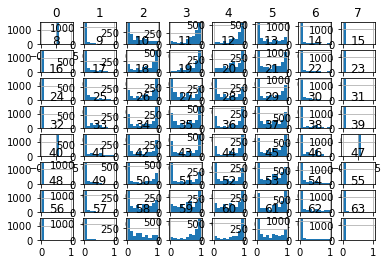

In [9]:
print('Here we normalise the scaled data using sklearns MinMaxScaler function')

from sklearn.preprocessing import MinMaxScaler

minScaler=MinMaxScaler()

sn_Xtrain=minScaler.fit_transform(ss_Xtrain)
sn_Xtest=minScaler.fit_transform(ss_Xtest)

print('\n')

##CHECK THIS HAS BEEN APPLIED
print('Xtrain features post scaling and normalising')
print(sn_Xtrain[0])
print('\n')

print('The application of the min max scaler has now normalised the x-axis to range of 0-1')
print('The returned value is now identical to our original analysis.')
print('This indicates that standardisation doesn''t impact the analysis')

##convert to df and plot histogram
df=pd.DataFrame(sn_Xtrain)
df.hist()
plt.show()

## Logistic Regression with normalised data

This model uses [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from the sklearn package. Given the multi-class problem of the dataset (where the target has nine possible outcomes) a 'multinomial' parameter is selected with a 'lbfgs' [solver](https://en.wikipedia.org/wiki/Limited-memory_BFGS) applied. The fit intercept parameter is turned on to ensure a bias is added to the decision function. 

The algorithm failed to converge to a solution when the maximum number of iterations was set to the default value of 100. This value was increased to 300 iterations. The increased number of maximum iterations allows the solver to converge the result but the question remains why did we have to increase the number of iterations in the first place? 

The number of iterations required to converge a solution is closely linked to the normalising and scaling of feature data. Clearly scaling the data to a range of 0-1 allows data to be more quickly compared across arrays but it does not account for data spread (i.e. the standard deviation from mean) or shape. A good explanation of normalising and standardising datasets and why it is import to correctly assess this feature can be found [here](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/). For regression analyses it is often useful to scale features to have a mean of 0 as a mean of 0 is easier to interpret in terms of the bias. 


In [10]:
##import logistic regression
from sklearn.linear_model import LogisticRegression
import numpy as np

LR=LogisticRegression(multi_class='multinomial', solver='lbfgs', fit_intercept=True, max_iter=300)
#FIT THE MODEL TO THE TRAINING SET
LR.fit(scaleXtrain, ytrain)
##GET A PREDICTION
y_pred=LR.predict(scaleXtest)

print('Training set score: %s'%(LR.score(scaleXtrain, ytrain)))

for i in np.arange(0, 10):
    print('The bias added to the decision function was %s for class %s'%(LR.intercept_[i], i) )

Training set score: 0.9874739039665971
The bias added to the decision function was 0.5107879389574294 for class 0
The bias added to the decision function was -2.652002715903597 for class 1
The bias added to the decision function was -0.15866678469260775 for class 2
The bias added to the decision function was 0.3201579916270643 for class 3
The bias added to the decision function was 3.541976335773017 for class 4
The bias added to the decision function was -0.7330741402097545 for class 5
The bias added to the decision function was -0.07060865754894405 for class 6
The bias added to the decision function was 1.3709128291177004 for class 7
The bias added to the decision function was -1.0476108061737275 for class 8
The bias added to the decision function was -1.0818719909466048 for class 9


In [11]:
# classification_report builds a text report showing the main classification metrics
from sklearn import metrics

print(f"Classification report for classifier {LR}:\n"
      f"{metrics.classification_report(ytest, y_pred)}\n")

Classification report for classifier LogisticRegression(max_iter=300, multi_class='multinomial'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.91      0.94      0.93        34
           2       0.97      0.97      0.97        37
           3       1.00      1.00      1.00        37
           4       1.00      0.97      0.99        38
           5       0.94      0.88      0.91        33
           6       0.98      0.96      0.97        45
           7       1.00      0.98      0.99        41
           8       0.82      0.90      0.86        31
           9       0.91      0.94      0.93        34

    accuracy                           0.96       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.96      0.96      0.96       360




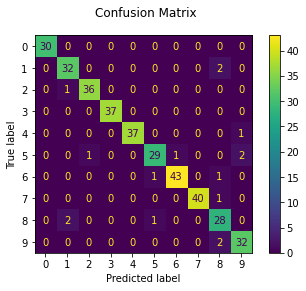

In [12]:
## Confusion matrix 
# of the true digit values and the predicted digit values

disp = metrics.plot_confusion_matrix(LR, scaleXtest, ytest)
disp.figure_.suptitle("Confusion Matrix for Logistic Regression")

plt.show()

# MLP method with normalised data

The MLP [classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) optimises the log-loss function through the use of a specific solver. In this model we apply stochastic gradient decent with a learning rate initialised at $0.1$ and a regularisation penalty of $1e-4$. The max iteration parameter (max_iter) controls the number of epochs (how many times each data point is used) incurred prior to convergence. For each optimisation check if the score is ot improved by the tolerance value (tol=$1e-4$) then convergence is assumed to have occured and training stops. 

Here we investigate whether MLP can return a better assessment of the MNIST dataset compared to the logistic regression method. 


In [21]:
##IMPORT MLP
from sklearn.neural_network import MLPClassifier

MLPC=MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, alpha=1e-4, solver='sgd',
                  verbose=10, tol=1e-4, random_state=1, learning_rate_init=0.1)

##train the model with normalised x data
MLPC.fit(scaleXtrain, ytrain)

Iteration 1, loss = 2.12951186
Iteration 2, loss = 1.28784301
Iteration 3, loss = 0.56572642
Iteration 4, loss = 0.29734188
Iteration 5, loss = 0.21321491
Iteration 6, loss = 0.17196534
Iteration 7, loss = 0.14792721
Iteration 8, loss = 0.13088244
Iteration 9, loss = 0.12023984
Iteration 10, loss = 0.10515754
Iteration 11, loss = 0.09699636
Iteration 12, loss = 0.09050797
Iteration 13, loss = 0.09185828
Iteration 14, loss = 0.08116800
Iteration 15, loss = 0.07787484
Iteration 16, loss = 0.07287105
Iteration 17, loss = 0.06803019
Iteration 18, loss = 0.06435668
Iteration 19, loss = 0.06028520
Iteration 20, loss = 0.05689239
Iteration 21, loss = 0.05497664
Iteration 22, loss = 0.05159290
Iteration 23, loss = 0.05022834
Iteration 24, loss = 0.04781234
Iteration 25, loss = 0.04789189
Iteration 26, loss = 0.04576987
Iteration 27, loss = 0.04465809
Iteration 28, loss = 0.04110776
Iteration 29, loss = 0.04095576
Iteration 30, loss = 0.04056565
Iteration 31, loss = 0.03773621
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, random_state=1,
              solver='sgd', verbose=10)

In [22]:
##LET LOOK AT HOW ACCURATE THE SCORES ARE

##PRINT THE TRAINING SCORE
print('Training score: %s'%(MLPC.score(scaleXtrain, ytrain)))

##PREDICT THE TEST SET
MLPC.predict(scaleXtest)

##SCORE THE TEST SET
print('Test score: %s'%(MLPC.score(scaleXtest, ytest)))

Training score: 1.0
Test score: 0.9638888888888889


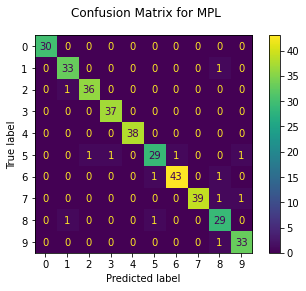

In [20]:
## Confusion matrix 
# of the true digit values and the predicted digit values

disp = metrics.plot_confusion_matrix(MLPC, scaleXtest, ytest)

disp.figure_.suptitle("Confusion Matrix for MPL")

plt.show()

## Summary



In this notebook I investigated the MNIST dataset using two machine learning algorithms. The data were pre-processed by applying a normalising function to reduced the range of data within the 0-1 scale. I also investigated whether standardising and normalising the data would affect the outcome. However applying standardisation followed by normalising procedure resulted in and identical array to that achieved through normalising alone. 

The normalised data were analysed using both logistic regression and the MLP algorithms. Both algorithms produced a similar test score of appoximately 96% accuracy. 

In this notebook I investigated the MNIST dataset using both logistic regression and MLP algorithms. The data was pre-processed using a normalisation technique The logistic regression method shows a high precision and recall indicating the model was able to correctly classify digits approximately 97% of the time. The confusion matrix shows the number '4' was misclassified on three occasions as a '1' and '8' and a '9'. The MLP method misclassifed the number '5' most often (four times).
